In [1]:
import numpy as np
import scipy.io

from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential, Input, Model
from keras.layers.core import Dense, Dropout, Activation, Reshape, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
mat = scipy.io.loadmat('Data/train_32x32.mat')
mat = mat['X']
b, h, d, n = mat.shape

In [3]:
#Convert all RGB-Images to greyscale
img_gray = np.zeros(shape =(n, b, h, 1))

def rgb2gray(rgb): 
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(n):
    #Convert to greyscale
    img = rgb2gray(mat[:,:,:,i])
    img = img.reshape(1, 32, 32, 1)
    img_gray[i,:] = img

# Normalize input
img_gray = img_gray/255.

In [4]:
img_size = Input(shape=(b, h, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(img_size)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(img_size, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')#, metrics=['binary_accuracy'])

# Output summary of network
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [5]:
callbacks = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
n_epochs = 1000
batch_size = 128

autoencoder.fit(
 img_gray, img_gray,
 epochs=n_epochs,
 batch_size=batch_size,
 shuffle=True, validation_split=0.2
    callbacks=callbacks
 )

Train on 58605 samples, validate on 14652 samples
Epoch 1/1000
58605/58605 [==============================] - 10s - loss: 0.6394 - val_loss: 0.6270
Epoch 2/1000
58605/58605 [==============================] - 9s - loss: 0.6252 - val_loss: 0.6236
Epoch 3/1000
58605/58605 [==============================] - 9s - loss: 0.6219 - val_loss: 0.6191
Epoch 4/1000
58605/58605 [==============================] - 9s - loss: 0.6200 - val_loss: 0.6198
Epoch 5/1000
58605/58605 [==============================] - 9s - loss: 0.6187 - val_loss: 0.6188
Epoch 6/1000
58605/58605 [==============================] - 9s - loss: 0.6176 - val_loss: 0.6159
Epoch 7/1000
58605/58605 [==============================] - 9s - loss: 0.6166 - val_loss: 0.6163
Epoch 8/1000
58605/58605 [==============================] - 9s - loss: 0.6159 - val_loss: 0.6158
Epoch 9/1000
58605/58605 [==============================] - 9s - loss: 0.6153 - val_loss: 0.6157
Epoch 10/1000
58605/58605 [==============================] - 9s - loss: 0.61

58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6090
Epoch 168/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6087
Epoch 169/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6093
Epoch 170/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6089
Epoch 171/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6086
Epoch 172/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6100
Epoch 173/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6096
Epoch 174/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6092
Epoch 175/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6088
Epoch 176/1000
58605/58605 [==============================] - 9s - loss: 0.6090 - val_loss: 0.6096
Epoch 177/1000
58605/5860

58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6089
Epoch 332/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6079
Epoch 333/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6080
Epoch 334/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6086
Epoch 335/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6082
Epoch 336/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6084
Epoch 337/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6092
Epoch 338/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6090
Epoch 339/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6082
Epoch 340/1000
58605/58605 [==============================] - 9s - loss: 0.6086 - val_loss: 0.6081
Epoch 341/1000
58605/5860

58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6078
Epoch 496/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6084
Epoch 497/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6083
Epoch 498/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6080
Epoch 499/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6088
Epoch 500/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6081
Epoch 501/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6086
Epoch 502/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6088
Epoch 503/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6087
Epoch 504/1000
58605/58605 [==============================] - 9s - loss: 0.6084 - val_loss: 0.6085
Epoch 505/1000
58605/5860

58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6080
Epoch 660/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6084
Epoch 661/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6078
Epoch 662/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6078
Epoch 663/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6085
Epoch 664/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6085
Epoch 665/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6086
Epoch 666/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6084
Epoch 667/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6081
Epoch 668/1000
58605/58605 [==============================] - 9s - loss: 0.6083 - val_loss: 0.6081
Epoch 669/1000
58605/5860

58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6082
Epoch 824/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6083
Epoch 825/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6081
Epoch 826/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6083
Epoch 827/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6083
Epoch 828/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6081
Epoch 829/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6075
Epoch 830/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6083
Epoch 831/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6080
Epoch 832/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6077
Epoch 833/1000
58605/5860

58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6080
Epoch 988/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6079
Epoch 989/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6077
Epoch 990/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6077
Epoch 991/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6084
Epoch 992/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6087
Epoch 993/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6087
Epoch 994/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6081
Epoch 995/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6077
Epoch 996/1000
58605/58605 [==============================] - 9s - loss: 0.6082 - val_loss: 0.6084
Epoch 997/1000
58605/5860

In [10]:
pred = autoencoder.predict(img_gray)

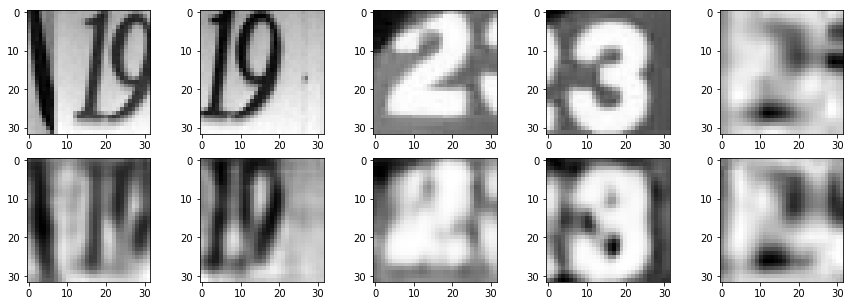

In [14]:
n = 5
plt.figure(figsize=(15, 5))
for i in range(n):
    rand = np.random.randint(len(img_gray))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_gray[i].reshape(32, 32), cmap='gray')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(pred[i].reshape(32, 32), cmap='gray')
plt.show()